# Описание проекта


Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Описание данных


- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откроем файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

df = pd.read_csv('/datasets/games.csv')

In [2]:
#изучим датасет
df.info()
display(df.head(5))
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Имеем незначительное количество пропусков в столбцах "Name", "Year_of_Release" и "Genre" и достаточно большое количество их же в столбцах с оценками критиков/игроков и рейтингом.


Можем предположить, незначительное количество пропусков возникло из-за ошибок выгрузки данных - эти значения в любом случае должны иметь место, т.к. название игры, год выпуска и её жанр - основа описания любой игры.

Пропуски в столбцах с рейтингом и оценками - осмелюсь предположить, что большая их часть приходится на ранний промежуток времени, когда игровая индустрия была не так заметна и критериев для оценки как таковых ещё выведено не было. Остальная же их часть - большинство игр, издаваемых на сегодняшний день, являются разработкой независимых студий и нередко избегают внимания критиков.


Пропуски в столбце с пользовательским рейтингом - причины могут быть аналогичными. 


Пропуски в столбце **Year_of_Release** допустимо заменить на аналогичное значение строк соответствующей игры, но с другой платформы, остальные пропуска заполним по мере надобности в процессе выполнения проекта.

In [3]:
#проверим датасет на наличие полных дубликатов:
df.duplicated().sum()

0

Дубликаты отсутствуют.

In [4]:
#посмотрим, присутствуют ли повторяющиеся жанры:
display(df.Genre.value_counts())

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Повторяющиеся жанры отсутствуют.

In [5]:
#посмотрим на значения столбца User_Score
display(df.User_Score.unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Присутствуют как и пустые значения, так и аббревиатура **"TBD"** (to be determined) - параметр пользовательской оценки не был определён на момент выгрузки данных.

Подобное строковое значение нам мешает, т.к. для расчётов данный столбец должен иметь тип **float** - заменим все значения TBD на NaN.

In [6]:
#выведем список платформ и количество игр с ними
df.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Сразу видно, что преобладают, в основном, консоли предыдущего поколения (Past-gen) - пик игровой индустрии, по всей видимости, совпадает с интервалом их жизни, но, при этом, консоли нового поколения по количеству игр ещё не успели даже приблизиться к ним, т.к. вышли относительно недавно.
Повторяющиеся платформы отсутствуют.

**Вывод по шагу**:


- Для упрощения работы с данным требуется изменить регистр названия столбцов на нижний.
- Тип данных столбца **Year_of_Release** изменим на **int**, т.к. подобная точность нам не требуется.
- Значения "tbd" в столбце User_Score заменим на NaN и изменим тип данного столбца на **float**.
- Дубликаты в датасете отсутствуют.
- Присутствуют пропуски в некоторых столбцах. Если пропуски в столбце с годом выпуска можно попробовать заменить на год выпуска этой же игры, но с другой платформы, то пропуски в столбцах с рейтингом и оценками игроков/критиков следует пока что оставить и вернуться к из заполнению в дальнейшем при необходимости.

### Шаг 2. Подготовка данных

**Изменим названия столбцов и преобразуем тип данных там, где это необходимо:**

In [7]:
#приведём названия столбцов к нижнему регистру:
df.columns = df.columns.str.lower()

#приведём значения столбца с годом выпуска к типу Int
#альтернатива astype(), игнорирующая ошибки "Cannot convert NA to integer"
df.year_of_release = pd.array(df.year_of_release, dtype="Int64")

#проверим:
display(df.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
297,Tekken Tag Tournament,PS2,2000,Fighting,1.68,1.51,0.51,0.35,85.0,8.5,T
841,NBA Live 2004,PS2,2003,Sports,1.57,0.18,0.00,0.27,86.0,7.7,E
13146,Medal of Honor: European Assault (weekly JP sa...,PS2,2005,Shooter,0.00,0.00,0.05,0.00,NaN,NaN,NaN
12206,Tropix,DS,2008,Puzzle,0.06,0.00,0.00,0.00,NaN,NaN,NaN
6154,Syphon Filter: Dark Mirror,PS2,2007,Shooter,0.14,0.11,0.00,0.04,70.0,7.8,T


Привели названия столбцов к нижнему регистру для упрощения работы с ними, изменили тип данных столбца с годом выпуска игры на int.

**Обработка пропусков**:

Посмотрим, есть ли у нас возможность заполнить пропуски в столбце с годом выпуска игры, используя аналогичное значение из строки с этой же игрой, но с другой платформы:

In [8]:
old_isna = df.year_of_release.isna().sum()

for name in df.query('year_of_release.isna()').name.unique():
    #df.query('name == @name').year_of_release = df.query('name == @name').year_of_release.max()
    df.loc[df['name'] == name, 'year_of_release'] =  df.loc[df['name'] == name, 'year_of_release'].max()

print('Заполнено пустых значений:', old_isna - df.year_of_release.isna().sum(), 'из', old_isna)

Заполнено пустых значений: 123 из 269


Таким образом, была заполнена практически половина пропусков в данном столбце, но это лучше, чем ничего.

Заменим значения "tbd" в столбце **user_score** на NaN и изменим тип данных на **float**:

In [9]:
df.user_score = df.user_score.replace('tbd', np.nan)

df.user_score = df.user_score.astype(float)
#проверим:
print(df.query('user_score == "tbd"').user_score.sum())

0.0


Обработали пропуски в столбце с годом выпуска (**year_of_release**) там, где это было возможно и заменили значения "tbd" на NaN в столбце **user_score**, также изменив и тип данных.

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:**

In [10]:
df['total_sales'] = df.iloc[:, 4: 8].sum(axis=1)
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4724,NBA 2K11,PS2,2010,Action,0.34,0.01,0.00,0.06,NaN,NaN,E,0.41
3737,War of the Monsters,PS2,2003,Fighting,0.26,0.20,0.00,0.07,80.0,8.9,T,0.53
3027,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...,DS,2006,Misc,0.00,0.00,0.66,0.00,NaN,NaN,NaN,0.66
466,Tom Clancy's Splinter Cell,XB,2002,Action,1.85,1.04,0.00,0.13,93.0,8.5,T,3.02
5211,Valkyrie Profile: Lenneth,PSP,2006,Role-Playing,0.17,0.01,0.16,0.02,80.0,8.4,T,0.36


**Вывод по шагу:**

Были переименованы столбцы и изменён тип данных в тех столбцах, в которых это было необходимо.

Избавились от части пропусков в столбце с годом выпуска - использовали строки с изданием этой же игры на других платформах, у которых в данном столбце пропусков не было.

Посчитали суммарные продажи по всем регионам и добавили значения в новый столбец.

Пропуски в столбцах с оценками пользователей/критиков пока что оставим без изменений, т.к. природа данных пропусков нам известна - данные игры не были оценены. Пропуски в рейтинге ESRB, по всей видимости, обусловлены тем, что возрастной рейтинг игре выдан не был.

###  Шаг 3. Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось за разные годы и важны ли данные за все периоды:**

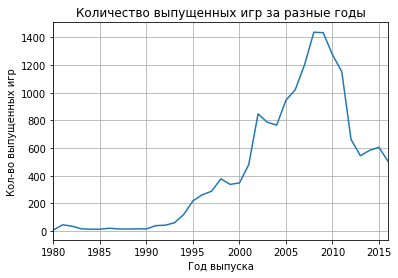

In [11]:
#построем график зависимости количества выпущенных игр от года выпуска
ax = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count').plot(legend=False, grid=True)
ax.set_xlabel("Год выпуска")
ax.set_ylabel('Кол-во выпущенных игр')
ax.set_title('Количество выпущенных игр за разные годы')
plt.show()

**Вывод:** можно заметить значительный рост количества выпущенных игр с 1990 года до 2008, после чего последовало падение количества, которое продолжается и на данный момент. Подобное поведение индустрии может быть связано с развитием мобильного гейминга и превращением мобильных устройств, таких как смартфон, в отдельную платформу, которая в нашей выгрузке данных не учитывается, но занимает огромную нишу индустрии видеоигр в целом.


Данные за все периоды для нас не важны. В идеале, нам бы могло хватить периода с момента выпуска актуального поколения консолей по текущий момент, либо аналогичный период, но с момента выпуска консолей предыдущего поколения.

Ответы на дальнейшие вопросы помогут нам выбрать актуальный период для анализа.

**Выберем платформы с наибольшими суммарными продажами, построим распределения:**

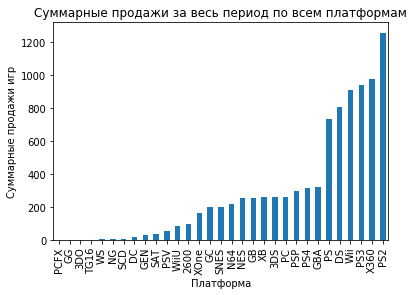

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [12]:
#построим график распределения по всем платформам за весь период
ax = pd.pivot_table(df, index='platform',
                    values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending='False').plot.bar(legend=False)
ax.set_xlabel("Платформа")
ax.set_ylabel("Суммарные продажи игр")
ax.set_title("Суммарные продажи за весь период по всем платформам")
plt.show()

#выведем топ-5 самых успешных платформ за весь период
pd.pivot_table(df, index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales',
                                                                                      ascending=False).head(5)

**Вывод:** 

Платформы, с наибольшим количеством проданных копий игр для них:

- PlayStation 2
- Xbox 360
- PlayStation 3
- Nintendo Wii
- Nintendo DS

Как мы можем заметить, на момент выгрузки данных наибольшее количество игр было продано для консолей предыдущего поколения.

Это обусловлено тем, что на момент выгрузки данных консоли текущего поколения не могут похвастаться большим количество выпущенных тайтлов, т.к. их продажа началась относительно недавно, в то время как старые консоли уже около 10 лет присутствуют на рынке.

**Посмотрим, как менялись продажи по платформам и ответим на вопрос, за какой характерных срок появляются новые платформы, а старые теряют актуальность.**

Считаю, что анализ будет более наглядным, если мы возьмём промежуток с момента выхода консолей седьмого поколения (2005 год - выход Xbox 360) по текущий момент. Это позволит нам увидеть динамику, с которой предыдущее поколение игровых консолей сменялось на текущее.

In [13]:
#сводная таблица платформа/продажи с 2005 года:
top_since_2005 = pd.pivot_table(df.query('year_of_release >= 2005'),
               index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
display(top_since_2005)

,total_sales
platform,
X360,966.61
PS3,935.19
Wii,903.31
DS,786.99
PS2,428.34
PS4,314.14
PSP,286.51
3DS,258.53
PC,170.84


Как мы можем видеть, в топ-10 входят консоли седьмого поколения, не считая PlayStation 2, которая оказалась достаточно долгоиграющей разработкой. При этом WiiU от Nintendo, хоть и является консолью восьмого поколения, значительно отстаёт по продажам от остальных консолей.

Для наглядности, выведем динамики пар консолей предыдущего поколения и текущего от одного производителя - Microsoft, Sony и Nintendo за один и тот же промежуток времени, который мы ранее выбрали как актуальный (2005-2016 год):

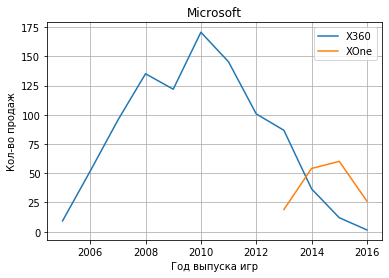

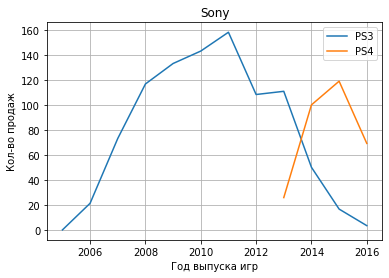

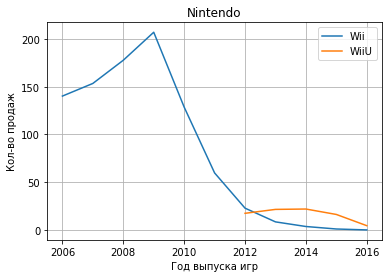

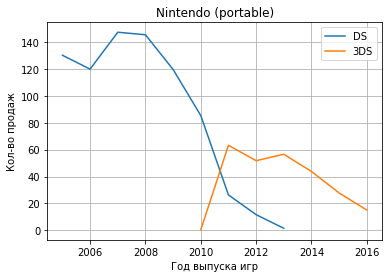

In [14]:
platform_dict = {'Microsoft': ['X360', 'XOne'], 'Sony': ['PS3', 'PS4'],
                 'Nintendo': ['Wii', 'WiiU'], 'Nintendo (portable)': ['DS', '3DS']}

for key, value in platform_dict.items():
    fig, ax = plt.subplots()

    for platform in value:
        plt.plot(pd.pivot_table(df.query('year_of_release >= 2005 & platform == @platform'),
                                index='year_of_release', values='total_sales', aggfunc='sum'))
    ax.legend(value)
    ax.set_xlabel('Год выпуска игр')
    ax.set_ylabel('Кол-во продаж')
    ax.set_title(key)
    plt.grid()
    plt.show()

**Вывод:** 

В качестве актуального периода был взят временной промежуток от 2005 до 2016 года - он включает в себя как консоли предыдущего поколения, так и текущего и позволяет точнее оценить потребности пользователей, т.к игровая индустрия за это не время не успела кардинально поменяться.

Самые продаваемые консоли за актуальный период - продукция от Sony и Microsoft. Несмотря на то, что в наших данных преобладают продажи консолей предыдущего поколения, следует сделать акцент на постепенно возрастающую популярность консолей нового поколения от этих же производителей.

Пик продаж наступает примерно в середине цикла жизни игровой платформы, после чего постепенно идёт на спад.

Судя по графикам, жизненный путь актуальной консоли составляет примерно 10 лет и примерно за 5 лет консоль набирает популярность, после чего эта популярность идёт на спад.
Можем заметить, что линейка консолей Wii от Nintendo первое время была достаточно интересным проектом из-за своих особенностей, но не смогла выдержать конкуренцию с другими платформами.

<br>

**Построим диаграммы размаха по глобальным продажам игр с разбивкой на платформы:**

Выберем более актуальный период - временной промежуток от 2013 года по настоящее время.

In [15]:
#отберём топ-5 платформ в актуальном временном промежутке, используя сводную таблицу, составленную ранее
df_top_5 = df.query('(platform.isin(@top_since_2005.head(5).index)) & (year_of_release >= 2005)')

In [16]:
#посмотрим, какие платформы по продажам значительно отличаются от других:
pd.pivot_table(df.query('year_of_release >= 2013'),
               index='platform', values='total_sales').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,0.801378
X360,0.735484
XOne,0.645020
Wii,0.593913
WiiU,0.562000
PS3,0.525884
3DS,0.472772
PC,0.208646
DS,0.192500


Видно, что на первые семь платформ приходится большее количество продаж, но нас интересуют более актуальные платформы последнего поколения - **PS4**, **Xbox One** и портативная **Nintendo 3DS**, т.к. мы выяснили ранее, что актуальность консолей предыдущего поколения уже подходит к концу.

In [17]:
#отберём актуальные платформы:
platform_analysys = ['PS4', 'XOne', '3DS']

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


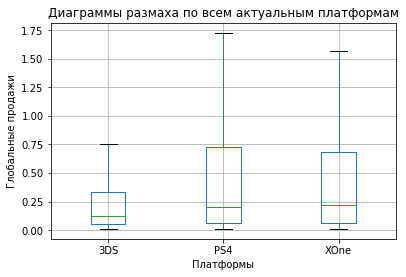

In [18]:
#Построим диаграммы размаха, избавившись от выбросов:

df.query('platform.isin(@platform_analysys)').boxplot(by='platform', column='total_sales', showfliers=False)
plt.title('Диаграммы размаха по всем актуальным платформам')
plt.suptitle('')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи')

plt.show()

**Вывод:** по графику видно, что больше всего продаж за актуальный период из актуальных консолей у **PlayStation 4**, чуть меньше - у **Xbox One**.

<br>

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Соотнесём выводы с продажами игр на других платформах.**

Мы определили, что самая популярная платформа за актуальный период - **PlayStation 4**. Построим диаграмму рессеяния и посчитаем корреляцию между отзывами и продажами:

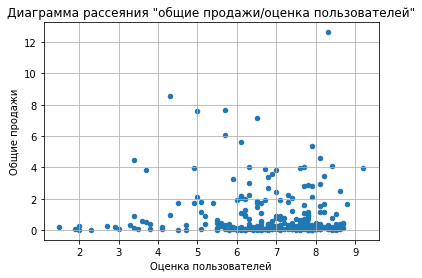

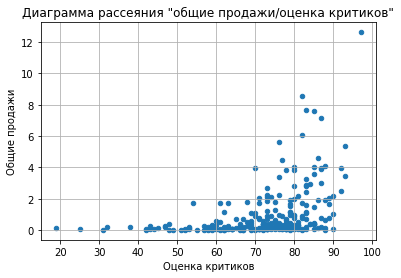

Индекс корреляции между оценками пользователей и продажами: -0.031957110204556424
Индекс корреляции между оценками критиков и продажами: 0.40656790206178095


In [19]:
#строим диаграммы
df.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('Диаграмма рассеяния "общие продажи/оценка пользователей"')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.show()

df.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('Диаграмма рассеяния "общие продажи/оценка критиков"')
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.show()

#выведем индекс корреляции:
print('Индекс корреляции между оценками пользователей и продажами:',
      df.query('platform == "PS4"').user_score.corr(df.query('platform == "PS4"').total_sales))
print('Индекс корреляции между оценками критиков и продажами:',
      df.query('platform == "PS4"').critic_score.corr(df.query('platform == "PS4"').total_sales))

**Вывод:** слабая корреляция между оценками критиков и продажами и очень слабая корреляция между оценками пользователей и продажами.

Сравним с аналогичными показателями других актуальных платформ:

In [20]:
def correlation(platform):
    df.query('platform == @platform').plot(x='user_score', y='total_sales', kind='scatter', grid=True)
    plt.title('Диаграмма рассеяния "общие продажи/оценка пользователей ({})"'.format(platform))
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Общие продажи')
    plt.show()

    df.query('platform == @platform').plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
    plt.title('Диаграмма рассеяния "общие продажи/оценка критиков ({})"'.format(platform))
    plt.xlabel('Оценка критиков')
    plt.ylabel('Общие продажи')
    plt.show()

    #выведем индекс корреляции:
    print('Индекс корреляции между оценками пользователей и продажами:',
      df.query('platform == @platform').user_score.corr(df.query('platform == @platform').total_sales))
    print('Индекс корреляции между оценками критиков и продажами:',
      df.query('platform == @platform').critic_score.corr(df.query('platform == @platform').total_sales))

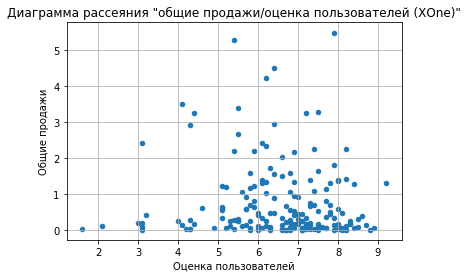

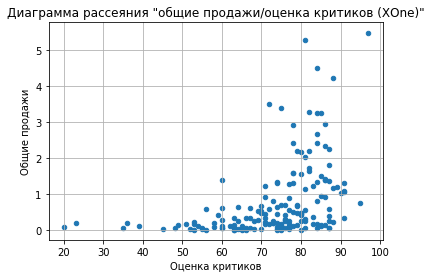

Индекс корреляции между оценками пользователей и продажами: -0.06892505328279414
Индекс корреляции между оценками критиков и продажами: 0.4169983280084017


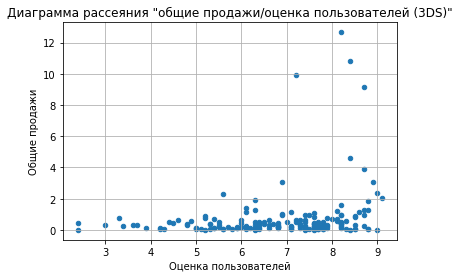

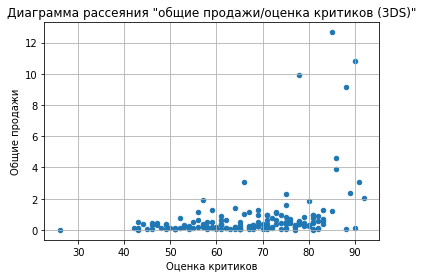

Индекс корреляции между оценками пользователей и продажами: 0.22480798039571082
Индекс корреляции между оценками критиков и продажами: 0.3494009303924131


In [21]:
for platform in platform_analysys[1::]:
    correlation(platform)

**Вывод:** практически у всех платформ корреляция между оценками пользователей и продажами слишком слабая, но корреляция между отзывами критиков и продажами выражена гораздо сильнее.

**Посмотрим на общее распределение игр по жанрам и выделим жанры с самыми высокими и самыми низкими показателями:**

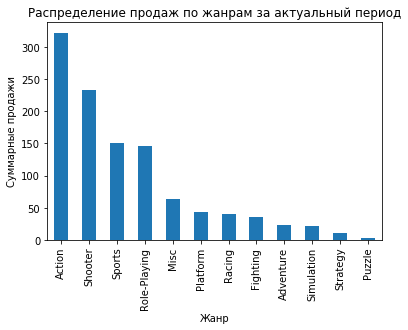

In [22]:
actual = df.query('year_of_release >= 2013')

#создадим таблицу жанр/общие продажи за актуальный период:
genre_distribution = pd.pivot_table(actual, index='genre',
                                    values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

#избавляемся от мультииндекса:
genre_distribution = genre_distribution.reset_index()

#построим график распределения по жанрам:
genre_distribution.plot.bar(x='genre', y='total_sales', legend=False)
plt.title('Распределение продаж по жанрам за актуальный период')
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр')
plt.show()

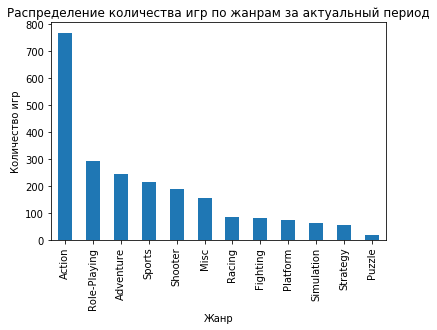

In [23]:
#посмотрим распределение количества игр по жанрам:
genre_distribution = pd.pivot_table(actual, index='genre',
                                    values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)
genre_distribution = genre_distribution.reset_index()

#построим график распределения количества по жанрам:
genre_distribution.plot.bar(x='genre', y='total_sales', legend=False)
plt.title('Распределение количества игр по жанрам за актуальный период')
plt.ylabel('Количество игр')
plt.xlabel('Жанр')
plt.show()

**Вывод:** лучше всего продаются игры жанра "Action", хуже всего - стратегические игры.

Судя по графику, количество игр жанра "Action" значительно превышает количество игр других жанров - можно сделать вывод, что высокие суммарные продажи в этом жанре приносит штампование относительно недорогих игр. Остальные жанры подобным отличием не выделяются.

**Вывод по шагу:**

По результатам проделанного анализа, мы пришли к следующим выводам:
- Лучше всего продаются игры жанра Action, Sports, Shooter.
- Самые популярные консоли за актуальный период - Xbox 360 и Playstation 3.
- Оценка пользователей в меньшей степени влияет на продажи, чем оценка критиков.
- Актуальный период - год выпуска консолей придыдущего поколения по сегодняшний день, так как он в полной мере может предоставить информацию о предпочтениях игроков.
- Средняя продолжительность жизни консоли - 10 лет, при этом в середине жизненного цикла можно заметить падение уровня популярности консоли.

<br>

### Шаг 4. Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5).
- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.


Рассмотрим актуальный период в целом и сравним его с показателями за последние два года - это позволит сделать выводы, насколько сильно изменился рынок игровой индустрии.

**Портрет пользователя NA**:

In [24]:
#функция, выводящая графики по пользователю определённого региона с фильтрацией по году

In [25]:
def region_stat(region, since, period):
    platform_pivot_actual = pd.pivot_table(df.query('year_of_release >= @since'), index='platform',
                                           values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    genre_pivot_actual = pd.pivot_table(df.query('year_of_release >= @since'),
                                        index='genre',values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    rating_pivot_actual = pd.pivot_table(df.query('year_of_release >= @since'), index='rating',
                                         values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index()
    
    display(platform_pivot_actual.head(5))
    display(genre_pivot_actual.head(5))
    display(rating_pivot_actual.head(5))
    
    ax = platform_pivot_actual.head(5).plot.bar(x='platform', legend=False)
    ax.set_title('Топ-5 платформ за весь период')
    ax.set_xlabel('Платформа')
    ax.set_ylabel('Продажи')
    plt.show()
    
    ax = genre_pivot_actual.head(5).plot.bar(x='genre', legend=False)
    ax.set_title('Топ-5 жанров за {}'.format(period))
    ax.set_xlabel('Жанр')
    ax.set_ylabel('Продажи')
    plt.show()
    
    ax = rating_pivot_actual.head(5).plot.bar(x='rating', legend=False)
    ax.set_title('Топ-5 рейтинг за {}'.format(period))
    ax.set_xlabel('Рейтинг')
    ax.set_ylabel('Продажи')
    plt.show()

Статистика за весь актуальный период:


,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


,genre,na_sales
0,Action,126.13
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


,rating,na_sales
0,M,165.29
1,E,79.05
2,E10+,54.24
3,T,49.79


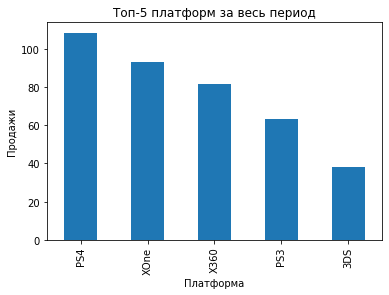

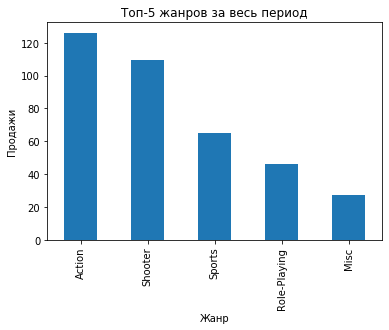

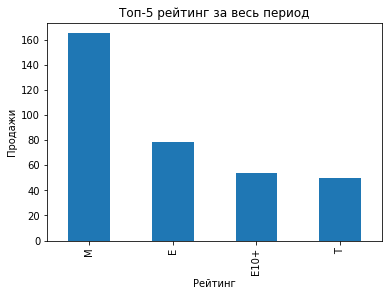

In [26]:
#выведем портрет пользователя из Северной Америки за весь актуальный период (2013-2016)
print('Статистика за весь актуальный период:')
region_stat('na_sales', 2013, 'весь период')

Статистика за последние два года:


,platform,na_sales
0,PS4,63.86
1,XOne,50.30
2,3DS,10.31
3,WiiU,8.86
4,X360,8.05


,genre,na_sales
0,Shooter,48.18
1,Action,33.68
2,Sports,26.31
3,Role-Playing,19.82
4,Misc,5.58


,rating,na_sales
0,M,47.03
1,E,26.59
2,T,22.86
3,E10+,17.87


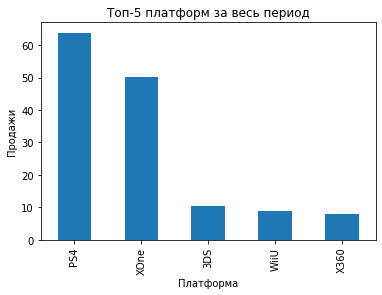

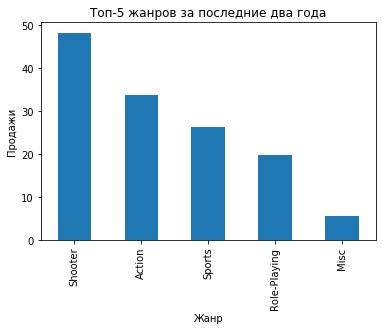

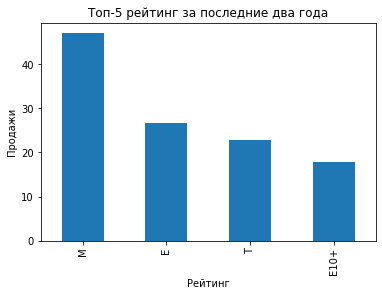

In [27]:
#выведем портрет пользователя из Северной Америки за последние два года (2015-2016)
print('Статистика за последние два года:')
region_stat('na_sales', 2015, 'последние два года')

**Вывод:**

За весь период пользователи предпочитали следующие платформы: **PlayStation 4**, **Xbox One** и **Xbox 360**. Изменения за последние несколько лет - **Xbox 360** потерял свою актуальность и предпочтения изменились: теперь самые популярные платформы - **PlayStation 4**, **Xbox One** и **Nintendo 3DS**.


Предпочтительные жанры сильно не поменялись, разве что игрокам стали больше по душе шутеры.

**Портрет пользователя EU**:

Статистика за весь актуальный период:


,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


,genre,eu_sales
0,Action,118.61
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


,rating,eu_sales
0,M,145.80
1,E,83.36
2,E10+,42.69
3,T,41.95


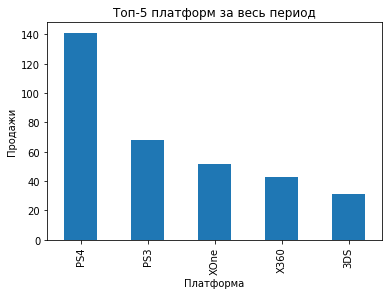

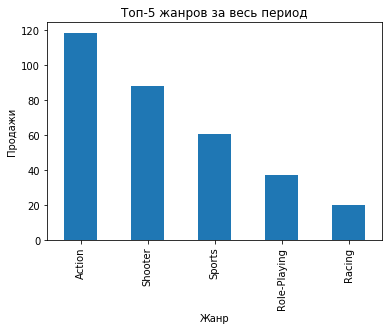

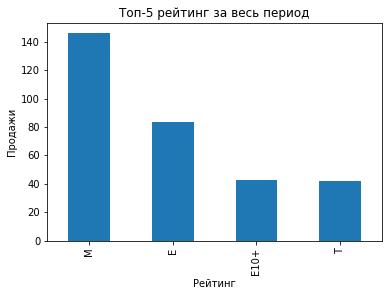

In [28]:
#выведем портрет пользователя из Европейского союза за весь актуальный период (2013-2016)
print('Статистика за весь актуальный период:')
region_stat('eu_sales', 2013, 'весь период')

Статистика за последние два года:


,platform,eu_sales
0,PS4,83.54
1,XOne,28.10
2,PC,9.10
3,3DS,7.39
4,PS3,7.30


,genre,eu_sales
0,Shooter,40.28
1,Action,34.82
2,Sports,27.82
3,Role-Playing,17.21
4,Racing,6.52


,rating,eu_sales
0,M,45.54
1,E,34.83
2,T,20.32
3,E10+,11.54


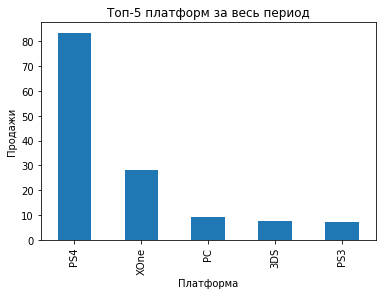

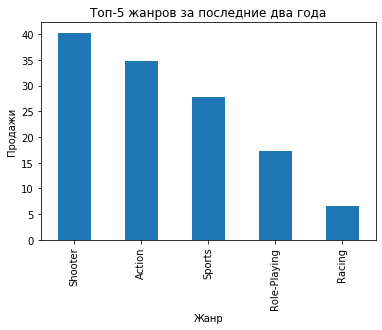

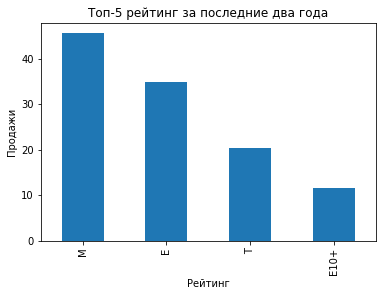

In [29]:
#выведем портрет пользователя из Европейского союза за последние два года (2015-2016)
print('Статистика за последние два года:')
region_stat('eu_sales', 2015, 'последние два года')

**Вывод:**

В Европейском союзе, в отличие от США, за весь период **Xbox 360** был менее популярной платформой - её место занимала **PlayStation 3**. В остальном предпочтения в плане игровой платформы не отличались. Изменения за последний годы схожи с теми, что произошли в США - **PlayStation 4** удерживает лидерство, но предыдущее поколение данной консоли заменил стационарный комьютер.

Предпочтительные жанры аналогично изменились - шутеры, точно так же, как и в США, вышли на первый план.

Также можно заметить схожее изменение предпочтений игроков касательно рейтинга игр - рейтинг "М" занимает первую строчку.

<br>

**Портрет пользователя JP:**

Статистика за весь актуальный период:


,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.44
3,Fighting,7.65
4,Shooter,6.61


,rating,jp_sales
0,T,20.59
1,E,15.14
2,M,14.11
3,E10+,5.89


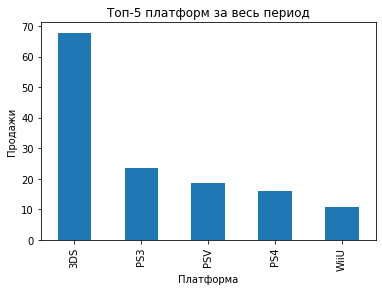

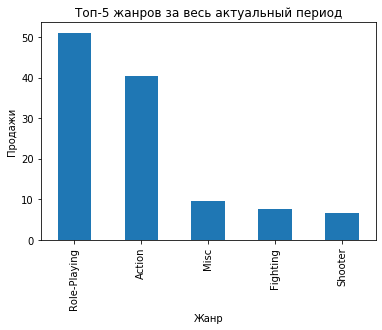

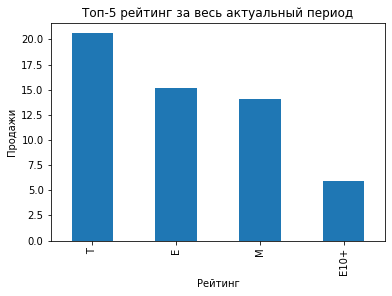

In [30]:
#выведем портрет пользователя из Японии за весь актуальный период (2013-2016)
print('Статистика за весь актуальный период:')
region_stat('jp_sales', 2013, 'весь актуальный период')

Статистика за весь последние два года:


,platform,jp_sales
0,3DS,23.55
1,PS4,12.05
2,PSV,8.41
3,PS3,4.97
4,WiiU,4.12


,genre,jp_sales
0,Action,23.05
1,Role-Playing,13.41
2,Shooter,3.79
3,Misc,3.19
4,Adventure,2.22


,rating,jp_sales
0,T,7.70
1,E,5.25
2,M,4.29
3,E10+,3.27


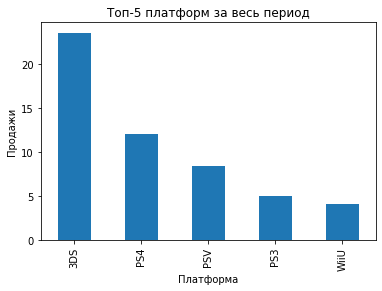

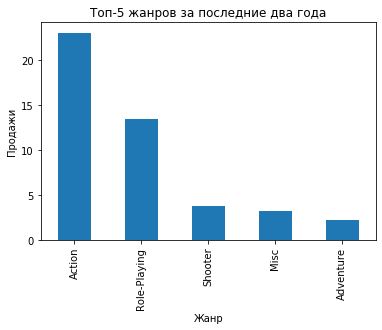

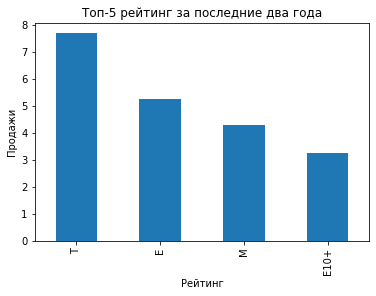

In [31]:
#выведем портрет пользователя из Японии за последние два года (2015-2016)
print('Статистика за весь последние два года:')
region_stat('jp_sales', 2015, 'последние два года')

**Вывод:**

Уже сразу можно сказать, что Япония значительно отличается от других регионов в своих предпочтениях - мобильные консоли являются более популярными что за весь период, что за последние два года.

Также можно заметить, что все популярные консоли являются продуктом местной разработки - тот же Xbox не смог стать достаточно популярным даже спустя несколько лет после релиза.

Пользователи Японии намного сильнее предпочитают жанр "Рпг" чем пользователи других регионов, что тогда, что и сейчас, но в той же степени предпочитают игры жанра "Экшн". Жанр "Спорт" им менее интересен, чем пользователям других регионов.

Также отличаются предпочтения касательно возрастного рейтинга игр, но он больше обусловлен более жестокой цензурой, чем в других регионах.

#### Общий вывод по шагу:


Хоть и актуальный период дал нам представление об общей картине, которая происходит на рынке игровой индустрии, более актуальную информацию мы получили, сравнив эти данные с данными за последние два года. Это позволило нам увидеть динамику развития рынка, что, в свою очередь, позволит сделать более грамотный анализ касательно выбора игровых платформ и игр к ним для продажи в магазине.

Уже можно сделать вывод, что больше всего игр для консолей текущего поколения продаётся для **PlayStation 4** во всех регионах. На втором месте идёт **Xbox One**. Третье место зависит от географического расположения и это нужно учитывать: если в США и Японии более предпочтительными являются мобильные консоли, то в Европе это место занимает персональный комьютер.

Касательно рейтинга: что в Европе, что в США, охотнее всего покупают игры с рейтингом **M** (От 17-ти и старше), но в Японии всё так же более популярны рейтинги "Для всех" и "Для подростков", что мы должны учитывать, если планируем продавать игры именно в этом регионе.

<br>

## Шаг 5. Проверим гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформируем гипотезы:
Нулевая гипотеза **H₀**: Средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

Альтернативная гипотеза **H₁**: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Требуется заметить, что год выпуска Xbox One - 2013 год. Будем использовать период с 2013 года по 2016.

In [32]:
#создадим две переменные, содержащие соответсвующие выборки данных из датасета:

xbox = df.query('platform == "XOne" & year_of_release >= 2013')
pc = df.query('platform == "PC" & year_of_release >= 2013')

#проверим, равны ли примерно дисперсии двух выборок:
print("Дисперсия пользовательской оценки Xbox One:", np.var(xbox.user_score))
print("Дисперсия пользовательской оценки PC:", np.var(pc.user_score))

Дисперсия пользовательской оценки Xbox One: 1.8965188383045526
Дисперсия пользовательской оценки PC: 2.9913239064252526


Дисперсии двух выборок не равны, **equal_var=False**.

In [33]:
#обозначаем уровень критической значимости
#если p-value окажется меньше него, у нас будут основания отвергнуть нулевую гипотезу
alpha = .05

results = st.ttest_ind(xbox.user_score.dropna(), pc.user_score.dropna(), equal_var=False)

if results.pvalue < alpha:
    print("P-value =", results.pvalue, '| Есть основания отвергнуть нулевую гипотезу')
else:
    print("P-value =", results.pvalue, '| Не получилось отвергнуть нулевую гипотезу')

P-value = 0.16174359801784308 | Не получилось отвергнуть нулевую гипотезу


**Вывод:** не получилось отвергнуть нулевую гипотезу - с вероятностью в 16% подобное различие можно получить случайным образом.

В целом, подобные выводы мы бы могли получить, просто проанализировав статистическое описание двух выборок: Средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

In [34]:
xbox.user_score.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [35]:
pc.user_score.describe()

count    158.000000
mean       6.280380
std        1.735044
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

<br>

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформируем гипотезы: Нулевая гипотеза H₀: Средние пользовательские рейтинги жанра Action и жанра Sports не отличаются.

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанра Action и жанра Sports отличаются.

In [36]:
#создадим две переменные, содержащие соответствующие выборке данных из датасета:

action = df.query('genre == "Action" & year_of_release >= 2013')
sports = df.query('genre == "Sports" & year_of_release >= 2013')

#проверим, равны ли примерно дисперсии двух выборок:
print('Дисперсия пользовательской оценки жанра "Экшн":', np.var(action.user_score))
print('Дисперсия пользовательской оценки жанра "Спорт":', np.var(sports.user_score))

Дисперсия пользовательской оценки жанра "Экшн": 1.761935586734694
Дисперсия пользовательской оценки жанра "Спорт": 3.160733984375


Дисперсии двух выборок не равны, **equal_var=False**.

In [37]:
#обозначаем уровень критической значимости
#если p-value окажется меньше него, у нас будут основания отвергнуть нулевую гипотезу
alpha = .05

results = st.ttest_ind(action.user_score.dropna(), sports.user_score.dropna(), equal_var=False)

if results.pvalue < alpha:
    print("P-value =", results.pvalue, '| Есть основания отвергнуть нулевую гипотезу')
else:
    print("P-value =", results.pvalue, '| Не получилось отвергнуть нулевую гипотезу')

P-value = 1.3883444596405356e-20 | Есть основания отвергнуть нулевую гипотезу


**Вывод:** p-value подобной малой величины даёт все основания полагать, что вероятность получить подобное различие между жанрами достаточно мала и можно сделать вывод, что средние пользовательские рейтинги по этим двум жанрам имеют статистически значимые различия.

### Выводы по шагу:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нет оснований отвергать нулевую гипотезу (**H₀: Средние пользовательские рейтинги платформ Xbox One и PC не отличаются**), рейтинги данных платформ с большой вероятностью одинаковы.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - имеем основание отбросить нулевую гипотезу (**Н₀: Средние пользовательские рейтинги жанра Action и жанра Sports не отличаются**) - получить подобные средние показатели случайным образом маловероятны и можно сделать вывод, что рейтинги существенно отличаются.

## Шаг 6. Общий вывод.

Мы подготовили данные к анализу: избавились от некоторого количества пропусков, переименовали названия столбцов для удобства в дальнейшей работе и изменили тип данных в столбцах, где это было необходимо.

Мы определили, что актуальным периодом, который наиболее корректно может показать тенденции в развитии индустрии, является период с момента появления консолей 7-го поколения по данный момент.

Сравнив показатели актуального периода и данные последних лет, нам удалось увидеть тенденции к изменению предпочтений игроков, что позволило сделать выводы по поводу возможного варианта выбора игр, которые нужно иметь в ассортименте магазина, независимо от региона, в котором будет располагаться сам магазин.

После составления портрета пользователей трёх регионов стало очевидно, что Европейский регион и Северная Америка по своим предпочтениям отличаются незначительно, чего не скажешь про различия с Японией - там преобладают мобильные консоли, более жестокая возрастная цензура и жанр РПГ и Экшн является более популярными, чем в других регионах.

Исходя из анализа, наиболее перспективная платформы для продаж на данный момент - Playstation 4 и Xbox One, но не стоит забывать про мобильные платформы, если планируются продажи в Японии.


Жанр, самый популярный, в среднем, за последние два года - Экшн - преобладает во всех проанализированных регионах и игр с этим жанром преобладающее количество.

Этих данных вполне хватает для построения дальнейших планов развития магазина, продающего видеоигры.

### **Чек-лист по заданиям**

- [x]  Открыты все файлы
- [x]  Файлы изучены (выведены первые строки, метод info())
- [x]  Заменены названия столбцов
- [x]  Данные приведены к нужным типам
- [x]  Обработаны пропуски
- [x]  Выполнено задание: Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x]  Выполнено задание: Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
- [x]  Выполнено задание: Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
- [x]  Выполнено задание: Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.
- [x]  Выполнено задание: Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x]  Выполнено задание: Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- [x]  Выполнено задание: Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.
- [x]  Выполнено задание: Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x]  Составлен портрет пользователя *NA,*
- [x]  Составлен портрет пользователя *EU*
- [x]  Составлен портрет пользователя  *JP*
- [x]  Проверена гипотеза: "Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;"
- [x]  Проверена гипотеза: "Средние пользовательские рейтинги жанров *Action* (англ. «действие») и *Sports* (англ. «виды спорта») разные."
- [x]  Есть пояснения к проверке гипотез: "как вы формулировали нулевую и альтернативную гипотезы"
- [x]  Есть пояснения к проверке гипотез: "какой критерий использовали для проверки гипотез и почему"
- [x]  В каждом этапе есть выводы
- [x]  Есть общий вывод